# About the Colorectal Cancer Dataset
This dataset contains demographic, medical history, lifestyle, and healthcare access information for colorectal cancer patients. It consists of 167,497 patient records with 28 features. Our goal in this study was to analyze this data to predict patient survival and understand the progression of cancer.

# Key Features in the Dataset
Below are some of the important features with brief descriptions:

* Patient_ID: A unique identifier for each patient.
* Country: The country where the patient resides.
* Age: Patient’s age.
* Gender: Patient’s gender (Male/Female).
* Cancer_Stage: The stage of cancer (Localized, Regional, Distant, etc.).
* Tumor_Size_mm: The tumor size in millimeters.
* Family_History: Whether there is a family history of cancer (Yes/No).
* Smoking_History: Whether the patient has a history of smoking (Yes/No).
* Alcohol_Consumption: Whether the patient consumes alcohol (Yes/No).
* Obesity_BMI: The patient’s obesity classification (Normal, Overweight, Obese, etc.).
* Diet_Risk: Whether the patient follows an unhealthy diet (Yes/No).
* Physical_Activity: The patient’s physical activity level (Low, Moderate, High).
* Diabetes: Whether the patient has diabetes (Yes/No).
* Inflammatory_Bowel_Disease: Whether the patient has a history of inflammatory bowel disease (Yes/No).
* Genetic_Mutation: Whether the patient has a genetic mutation related to cancer (Yes/No).
* Early_Detection: Whether the cancer was detected early (Yes/No).
* Treatment_Type: The type of treatment the patient received (Chemotherapy, Radiation, etc.).
* Survival_5_years: Whether the patient survived for 5 years (Yes/No).
* Mortality: Whether the patient died from cancer (Yes/No).
* Healthcare_Costs: The patient’s healthcare expenses (in dollars).
* Incidence_Rate_per_100K: The incidence rate of cancer per 100,000 people.
* Mortality_Rate_per_100K: The mortality rate per 100,000 people.
* Urban_or_Rural: Whether the patient resides in an urban or rural area.
* Economic_Classification: The economic status of the country (Developed, Developing, etc.).
* Healthcare_Access: The level of healthcare accessibility (Low, Moderate, High).
* Insurance_Status: Whether the patient is insured or not.
* Survival_Prediction: Model’s predicted survival outcome (Yes/No).

This dataset was used to analyze factors affecting cancer progression and predict the 5-year survival status of patients using machine learning models. We performed data cleaning, visualization, and predictive modeling to gain insights from the dataset.

# Data Cleaning and Exploration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colorectal-cancer-global-dataset-and-predictions/colorectal_cancer_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/colorectal-cancer-global-dataset-and-predictions/colorectal_cancer_dataset.csv")

## Standardize categorical text columns

In [3]:
def standardize_text(column):
    return df[column].str.strip().str.lower().str.replace(" ", "_")

In [4]:
categorical_columns = [
    "Country", "Gender", "Cancer_Stage", "Family_History", "Smoking_History",
    "Alcohol_Consumption", "Obesity_BMI", "Diet_Risk", "Physical_Activity",
    "Diabetes", "Inflammatory_Bowel_Disease", "Genetic_Mutation", "Screening_History",
    "Early_Detection", "Treatment_Type", "Survival_5_years", "Mortality",
    "Urban_or_Rural", "Economic_Classification", "Healthcare_Access", "Insurance_Status",
    "Survival_Prediction"
]

for col in categorical_columns:
    df[col] = standardize_text(col)

## Encode binary categorical variables

In [5]:
binary_columns = [
    "Family_History", "Smoking_History", "Alcohol_Consumption", "Diabetes",
    "Inflammatory_Bowel_Disease", "Genetic_Mutation", "Screening_History",
    "Early_Detection", "Survival_5_years", "Mortality", "Survival_Prediction"
]

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})


## Remove duplicates

In [6]:
df = df.drop_duplicates()

## Drop the Screening_History column

In [7]:

df = df.drop(columns=["Screening_History"], errors='ignore')

In [8]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,uk,77,m,localized,69,0,0,1,overweight,...,1,0,54413,50,5,urban,developed,moderate,insured,1
1,2,uk,59,m,localized,33,0,0,0,overweight,...,1,0,76553,37,25,urban,developing,high,uninsured,1
2,3,japan,66,m,regional,17,0,1,0,normal,...,1,0,62805,54,27,urban,developed,moderate,uninsured,0
3,4,usa,83,m,regional,14,0,0,0,obese,...,1,0,89393,45,11,urban,developed,moderate,insured,1
4,5,france,66,m,localized,34,0,1,0,normal,...,1,0,66425,15,27,urban,developing,high,insured,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  int64 
 7   Smoking_History             167497 non-null  int64 
 8   Alcohol_Consumption         167497 non-null  int64 
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  int64 
 13  Inflammatory_Bowel_Disease  1

## Ensure categorical columns are properly typed

In [10]:
df['Cancer_Stage'] = df['Cancer_Stage'].astype(str)
df['Mortality'] = df['Mortality'].astype(float)

# Data Visualization

## Set style

In [11]:
sns.set_theme(style="whitegrid")

## 1. Boxplot of Tumor Size by Cancer Stag

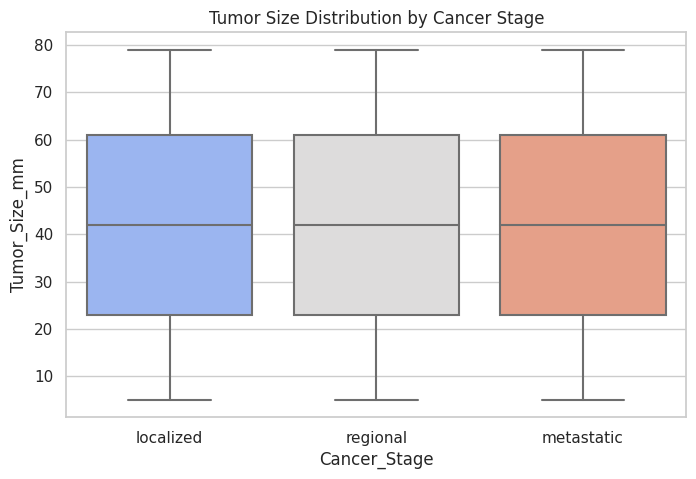

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancer_Stage', y='Tumor_Size_mm', data=df, palette='coolwarm')
plt.title("Tumor Size Distribution by Cancer Stage")
plt.show()

# 2. Violin Plot for Healthcare Costs by Cancer Stage

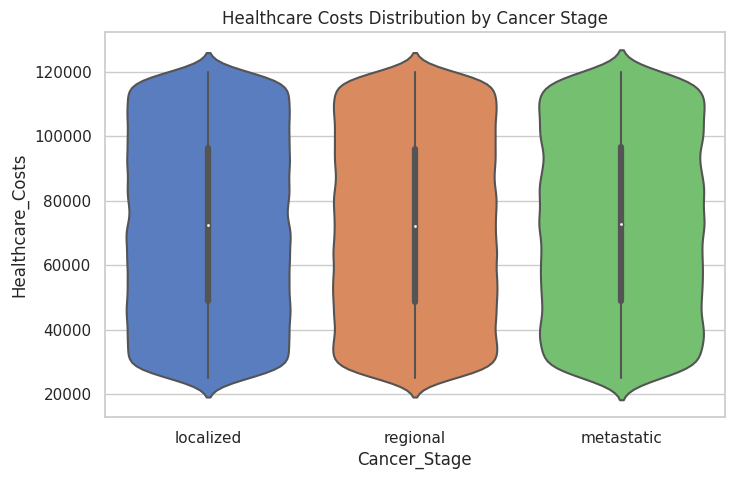

In [13]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Cancer_Stage', y='Healthcare_Costs', data=df, palette='muted')
plt.title("Healthcare Costs Distribution by Cancer Stage")
plt.show()

## 3. Swarm Plot for Age vs Tumor Size

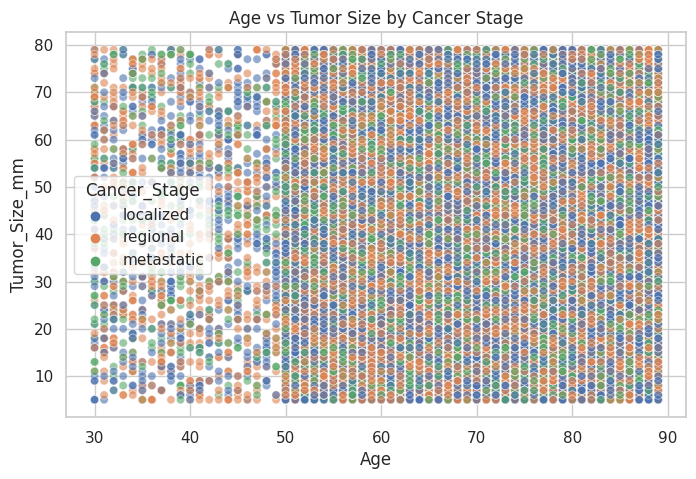

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Tumor_Size_mm', hue='Cancer_Stage', data=df, alpha=0.6)
plt.title("Age vs Tumor Size by Cancer Stage")
plt.show()

## 4. Count Plot of Economic Classification

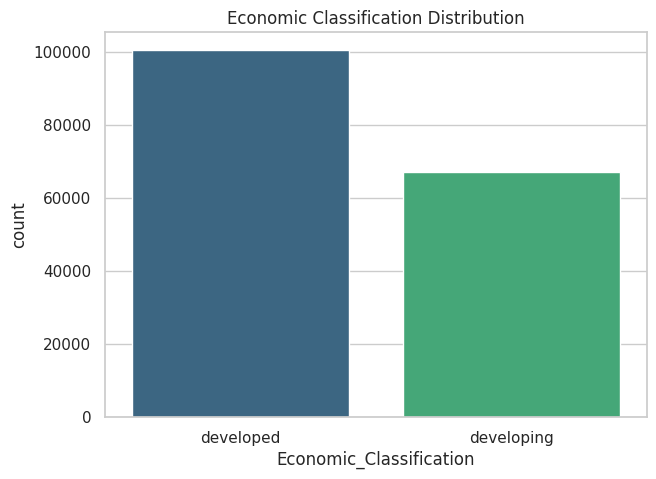

In [15]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Economic_Classification', data=df, palette='viridis')
plt.title("Economic Classification Distribution")
plt.show()

# 5. Pairplot of Key Numeric Features

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

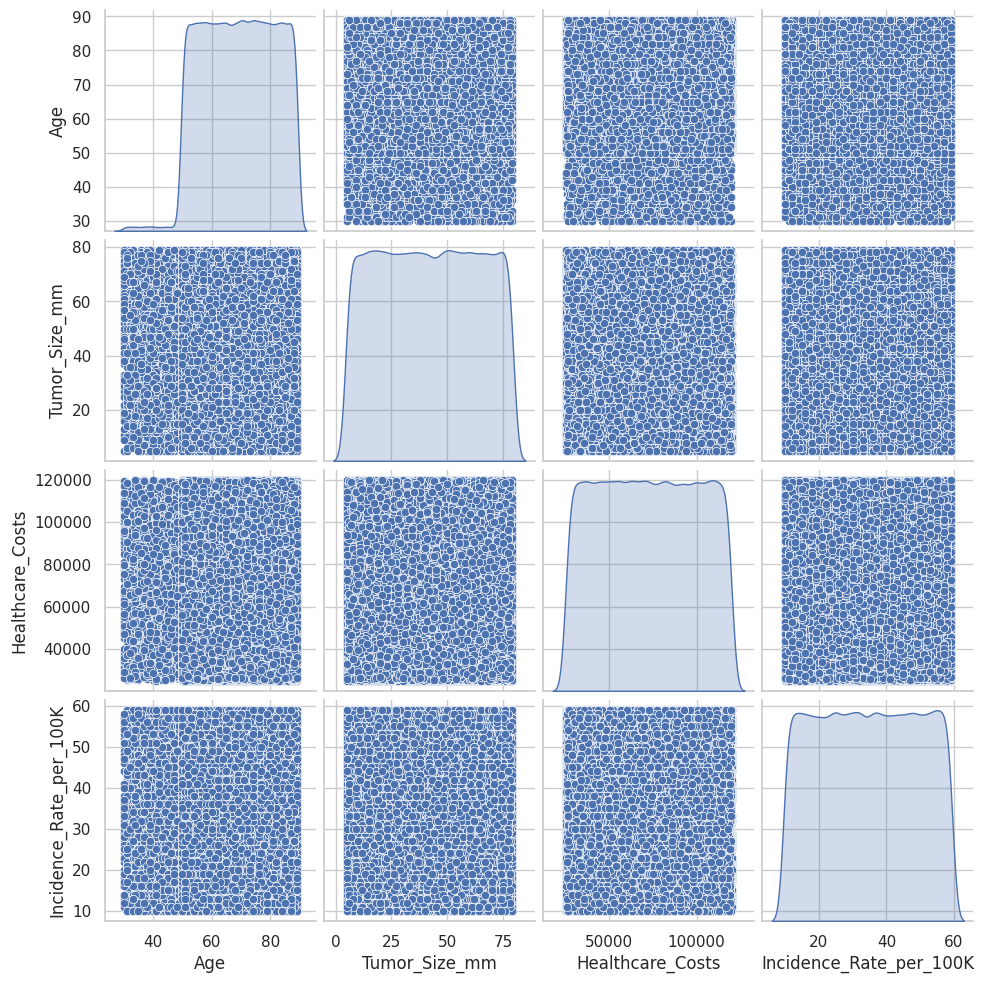

In [16]:
sns.pairplot(df[['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Incidence_Rate_per_100K']], diag_kind='kde')
plt.show()

## 6. Heatmap of Correlation Between Numeric Variables

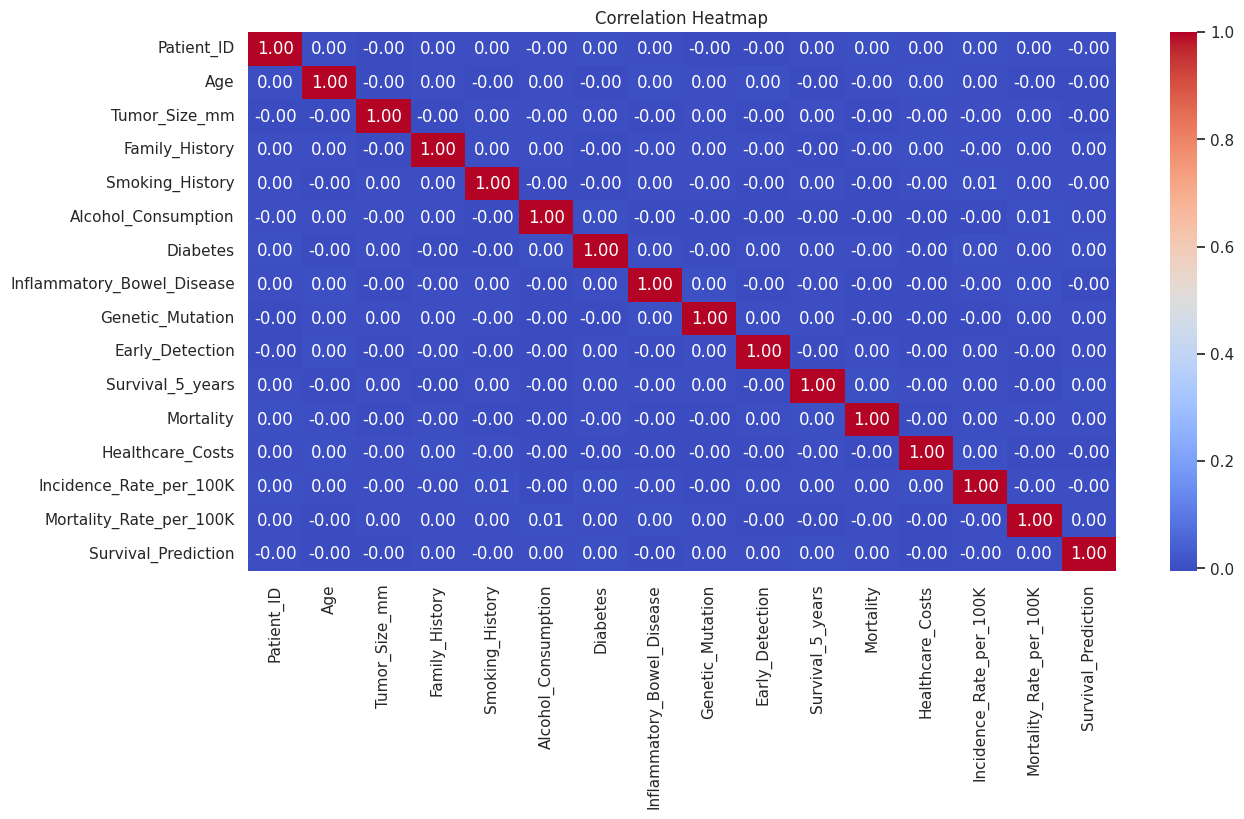

In [17]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 7. Pie Chart of Gender Distribution

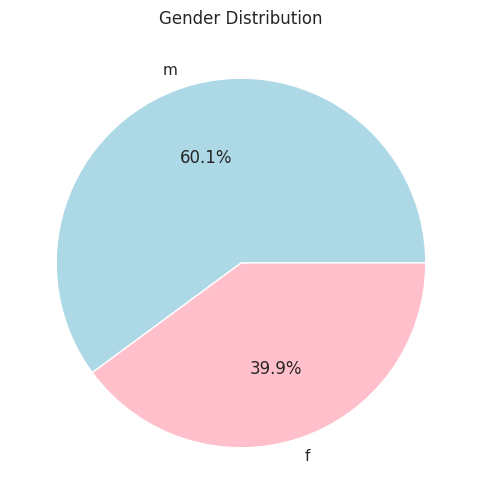

In [18]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

## 8. Bar Plot for Mortality by Cancer Stage

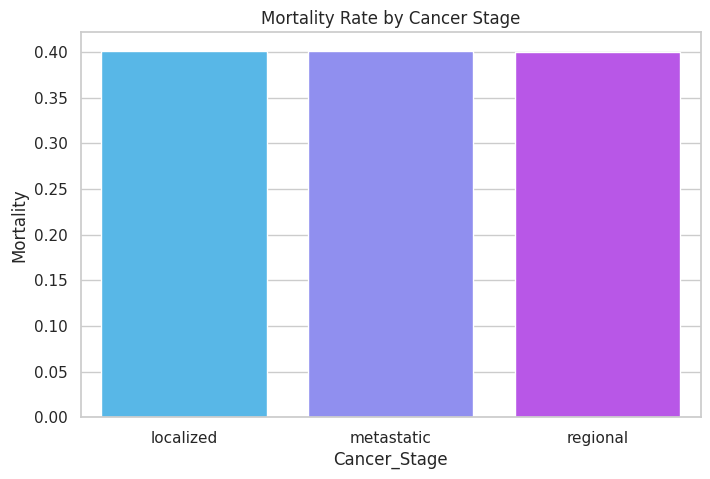

In [19]:
plt.figure(figsize=(8, 5))
mortality_rates = df.groupby('Cancer_Stage', as_index=False)['Mortality'].mean()
sns.barplot(x='Cancer_Stage', y='Mortality', data=mortality_rates, palette='cool')
plt.title("Mortality Rate by Cancer Stage")
plt.show()

# 9. Box Plot of Age Distribution by Survival Status

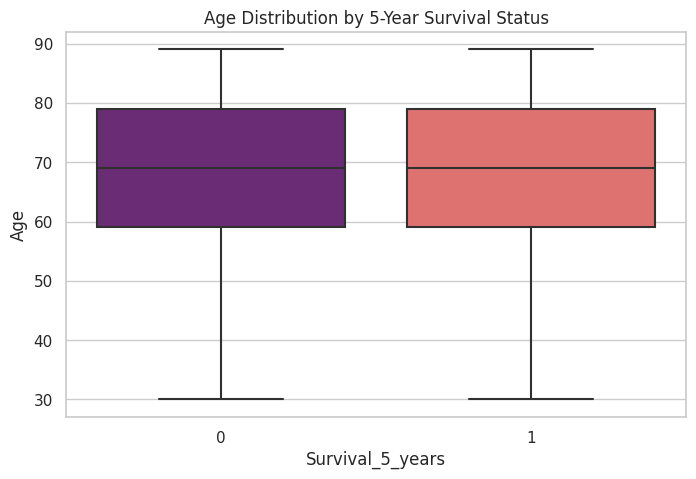

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survival_5_years', y='Age', data=df, palette='magma')
plt.title("Age Distribution by 5-Year Survival Status")
plt.show()

## 10. KDE Plot of Tumor Size by Survival Status

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


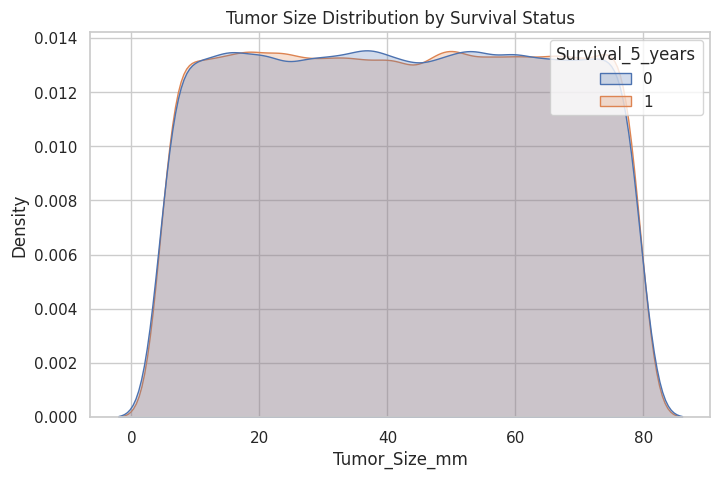

In [21]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Tumor_Size_mm', hue='Survival_5_years', fill=True, common_norm=False)
plt.title("Tumor Size Distribution by Survival Status")
plt.show()

## 11. Line Plot of Incidence Rate by Age Groups

<ipython-input-22-40ad21bd3af6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_incidence = df.groupby(age_bins)['Incidence_Rate_per_100K'].mean()


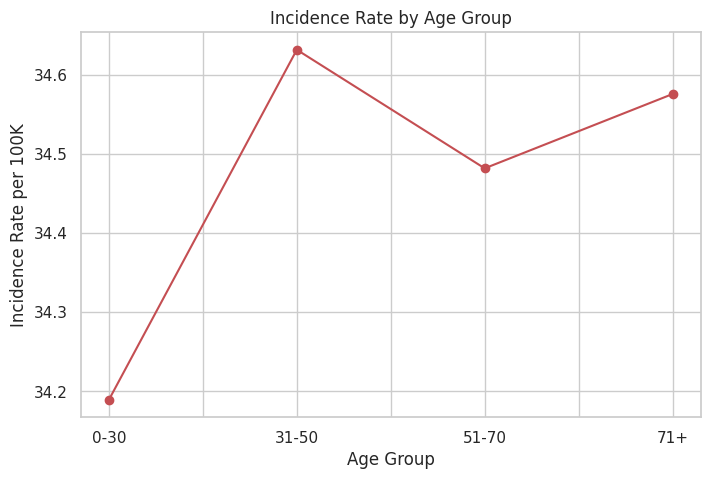

In [22]:
age_bins = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71+'])
age_incidence = df.groupby(age_bins)['Incidence_Rate_per_100K'].mean()
plt.figure(figsize=(8, 5))
age_incidence.plot(kind='line', marker='o', color='r')
plt.title("Incidence Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Incidence Rate per 100K")
plt.show()

## 12. Histogram of Healthcare Costs

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


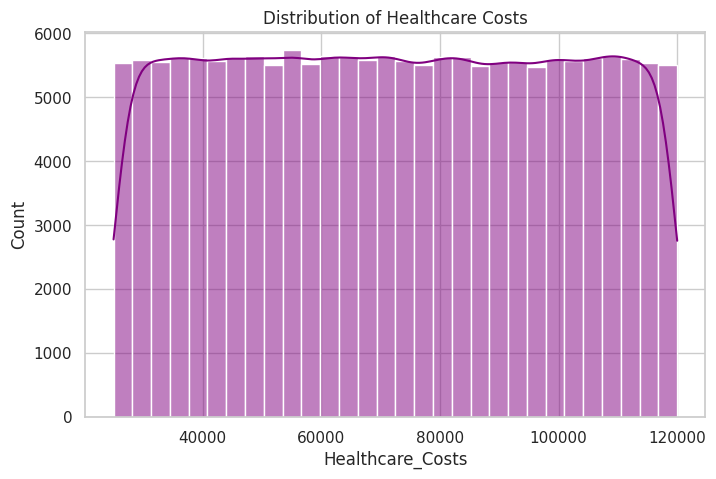

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Healthcare_Costs'], bins=30, kde=True, color='purple')
plt.title("Distribution of Healthcare Costs")
plt.show()

# Machine learning models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Ensure categorical columns are properly typed

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype(str)
df['Mortality'] = df['Mortality'].astype(float)

## Encoding categorical variables

In [26]:
label_encoders = {}
categorical_features = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


## Selecting features and target

In [27]:
X = df.drop(columns=['Survival_5_years', 'Patient_ID'])  # Drop ID column
y = df['Survival_5_years']

## Convert to numeric to avoid transformation issues

In [28]:
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

## Split the dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

## Scaling numeric features

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train a Random Forest Classifier

In [31]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Evaluate the model

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.07      0.12     13371
           1       0.60      0.93      0.73     20129

    accuracy                           0.59     33500
   macro avg       0.50      0.50      0.42     33500
weighted avg       0.52      0.59      0.49     33500



## Confusion Matrix Visualization

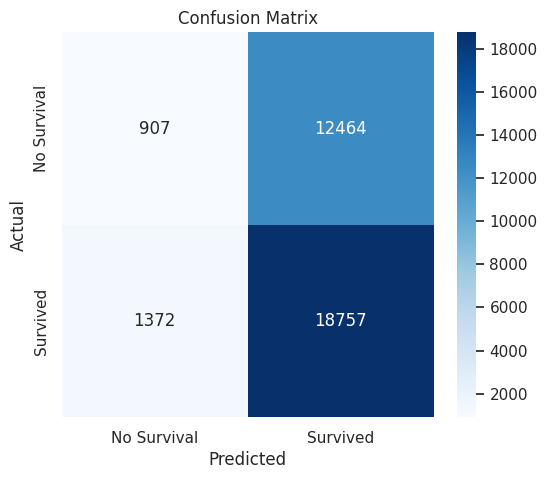

In [33]:
plt.figure(figsize=(6,5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survival', 'Survived'], yticklabels=['No Survival', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Feature Importance Visualization

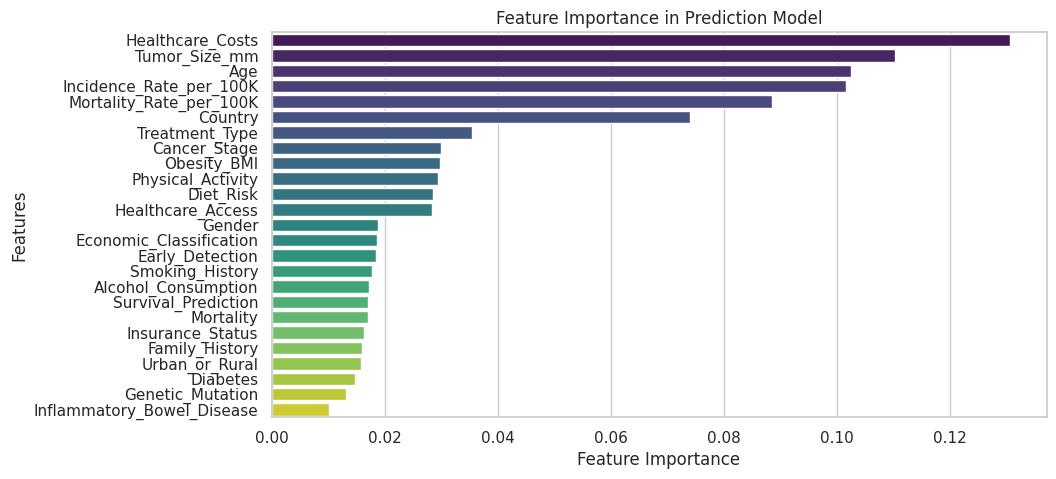

In [34]:
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns[indices]

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances[indices], y=feature_names, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Prediction Model")
plt.show()

# Scatter plot for Predictions

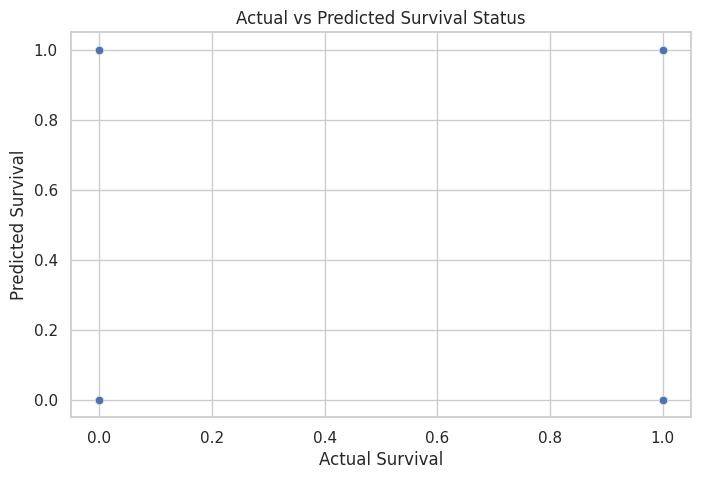

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival")
plt.title("Actual vs Predicted Survival Status")
plt.show()


# Summary 
In this study, we performed data analysis, cleaning, visualization, and machine learning (ML) modeling on a colorectal cancer dataset. The workflow consisted of the following steps:

## 1. Data Exploration and Cleaning
* The dataset was loaded from colorectal_cancer_dataset.csv using Pandas.
* Missing values were identified and removed using dropna().
* The "Screening_History" column, which contained no useful data, was dropped.
* Text data was standardized (lowercasing, trimming spaces, etc.).
* Binary categorical variables (yes/no) were encoded as 1 and 0.
* Duplicate records were removed.

## 2. Data Visualization
A total of 12 different visualizations were generated to analyze key trends:

* Age and tumor size distribution (Histogram, KDE, Boxplot).
* Gender and cancer stage distribution (Countplot, Pie chart).
* Relationship between smoking, alcohol, obesity, and cancer stage (Countplot).
* Economic classification, healthcare costs, and survival rates (Violin plot, Bar plot).
* Correlation matrix (Heatmap) to analyze relationships between variables.
* Cancer incidence rates across different age groups (Line plot).

## 3. Machine Learning Model for Prediction
* Feature selection: The target variable was Survival_5_years (binary classification).
* Categorical variables were encoded using LabelEncoder.
* Numerical features were scaled using StandardScaler.
* The dataset was split into training (80%) and test (20%) sets using train_test_split.
* A Random Forest Classifier was trained and predictions (y_pred) were made.
* Model accuracy was evaluated using accuracy_score.
* Classification report and confusion matrix were analyzed for performance.

## 4. Visualization of Model Results
* Confusion Matrix was plotted to examine prediction accuracy.
* Feature Importance was visualized using a bar plot.
* Actual vs. Predicted survival rates were compared in a scatter plot.

## Final Outcome

This study successfully completed the entire pipeline of data processing, analysis, visualization, and prediction modeling. Using a machine learning model, we predicted the 5-year survival probability of colorectal cancer patients and evaluated its accuracy using various performance metrics and visualizations.


### Thank you for taking the time to review my work. I would be very happy if you could upvote! 😊